<h1><center> Missing Data Imputation</center></h1>
<h3><center> Bin Yu, Nuoya Rezsonya, Yejur Singh Kunwar, Iram Bakhtiar</center></h3>

Requirements:

Step 1:
Using Sklearn get the Boston Housing dataset.
Fit a linear regressor to the data as a baeline.  There is no need to do Cross-Validation.  We are exploring the change in results

What is the loss and what are the goodness of fit parameters?  This will be our baseline for comparison

Step 2: (repeated)
For select between 1, 5 10, 20, 33, and 50% of your data on a single column (Completely at random), replace the present value with a NAN and then perform an imputation of that value.   

In. each case perform a fit with the imputed data and compare the loss and goodness of fit to your baseline.

Step 3: Take 2 different columns and create data “Missing at Random” when controlled for a third variable (i.e if Variable Z is > 30, than Variables X, Y are randomly missing).  Make runs with 10%, 20% and 30% missing data imputed via your best guess.  Repeat your fit and comparisons to the baseline.

Step 4:  Create a Missing Not at Random pattern in which 25% of the data is missing for a single column.    Impute your data, fit the results and compare to a baseline.

Step 5 (Extra Credit) (10 points):  Using the MCMC method, and your data from step 4, What is the difference in performance between imputation via ‘guess’ (mean/median, etc) and MCMC.


# Contents

1. [Abstract](#Abstract)
2. [Introduction](#Introduction)
3. [Background](#Background)
4. [Methods](#Methods)
5. [Results](#Results)
6. [Conclusion](#Conclusion)
7. [References](#References)
8. [Appendix: Code](#Appendix)

# Abstract




[Back to Contents](#Contents)

# Introduction

Boston Housing Dataset Definition:

* The Boston Housing Dataset
The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:
    * CRIM - per capita crime rate by town
    * ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    * INDUS - proportion of non-retail business acres per town.
    * CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    * NOX - nitric oxides concentration (parts per 10 million)
    * RM - average number of rooms per dwelling
    * AGE - proportion of owner-occupied units built prior to 1940
    * DIS - weighted distances to five Boston employment centres
    * RAD - index of accessibility to radial highways
    * TAX - full-value property-tax rate per \\$10,000
    * PTRATIO - pupil-teacher ratio by town
    * B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    * LSTAT -  \% lower status of the population
    * MEDV - Median value of owner-occupied homes in \\$1000's




[Back to Contents](#Contents)

# Background




[Back to Contents](#Contents)

# Methods




[Back to Contents](#Contents)

# Results




[Back to Contents](#Contents)

# Conclusion




[Back to Contents](#Contents)

# References

[1] https://www.kaggle.com/prasadperera/the-boston-housing-dataset

[2] https://datascience.stackexchange.com/questions/30245/is-there-a-way-to-replace-existing-values-with-nan?rq=1

[3] https://www.kaggle.com/prasadperera/the-boston-housing-dataset

[4] https://sdsawtelle.github.io/blog/output/mcmc-in-python-with-pymc.html
[Back to Contents](#Contents)

# Appendix: Codes




[Back to Contents](#Contents)

In [1]:
#!pip install ml_metrics 
#!pip install pymc 
#!pip install pymc3

### Import Packages

In [2]:
import numpy as np
import pandas as pd
import csv
from sklearn.linear_model import LinearRegression
import seaborn as sns;
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error, r2_score 
from ml_metrics import rmse
import matplotlib.pyplot as plt
import warnings
import random
from sklearn import preprocessing
import pymc 
from scipy.stats import norm

log = np.log
pi = np.pi

warnings.simplefilter('ignore')

%matplotlib inline

### Import data and exploring

In [3]:
# import data from csv file
# dataset downloaded from https://github.com/selva86/datasets/blob/master/BostonHousing.csv

file ="BostonHousing.csv"
df_housing = pd.read_csv(file) 

In [4]:
df_housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [6]:
df_housing = df_housing.astype({"chas": float, "rad": float, "tax": float})

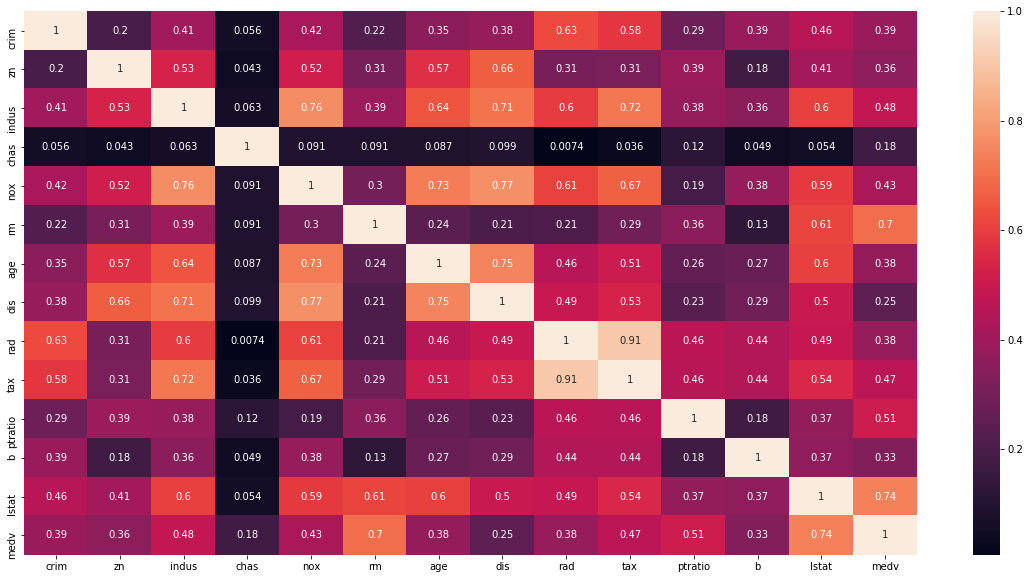

In [7]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_housing.corr().abs(),  annot=True)

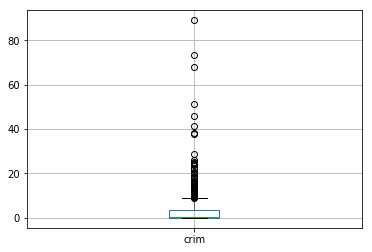

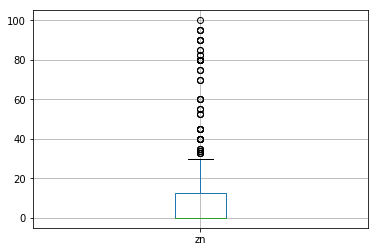

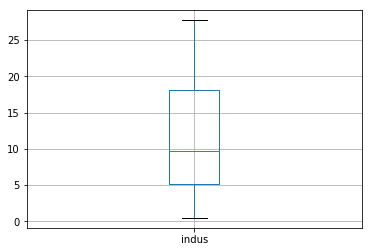

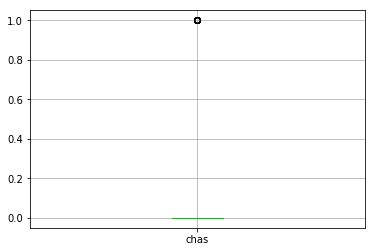

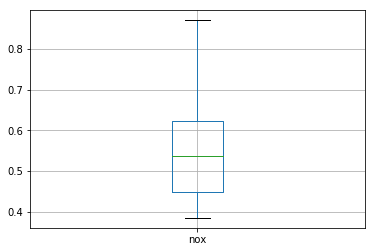

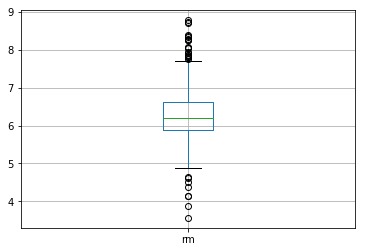

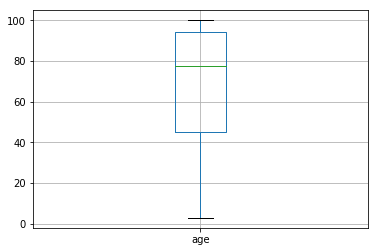

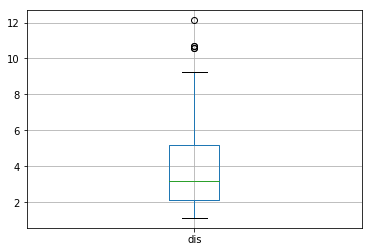

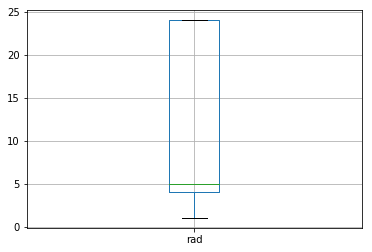

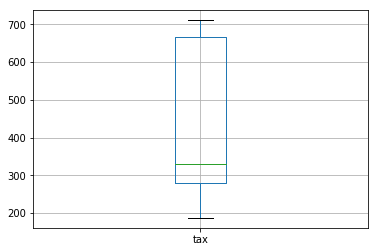

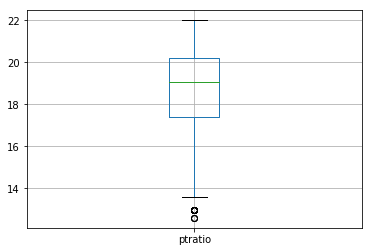

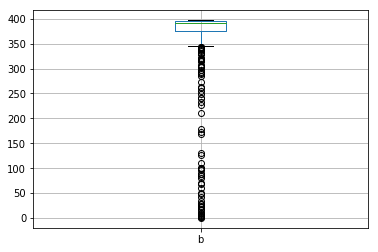

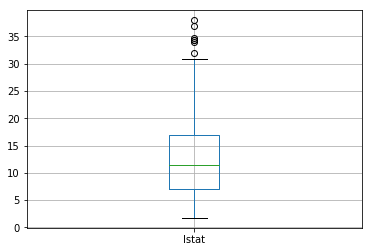

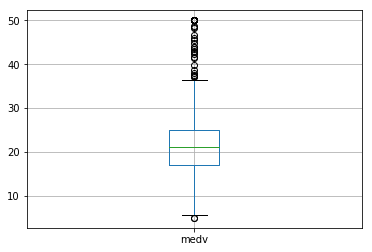

In [8]:


for column in df_housing:
    plt.figure()
    df_housing.boxplot([column])

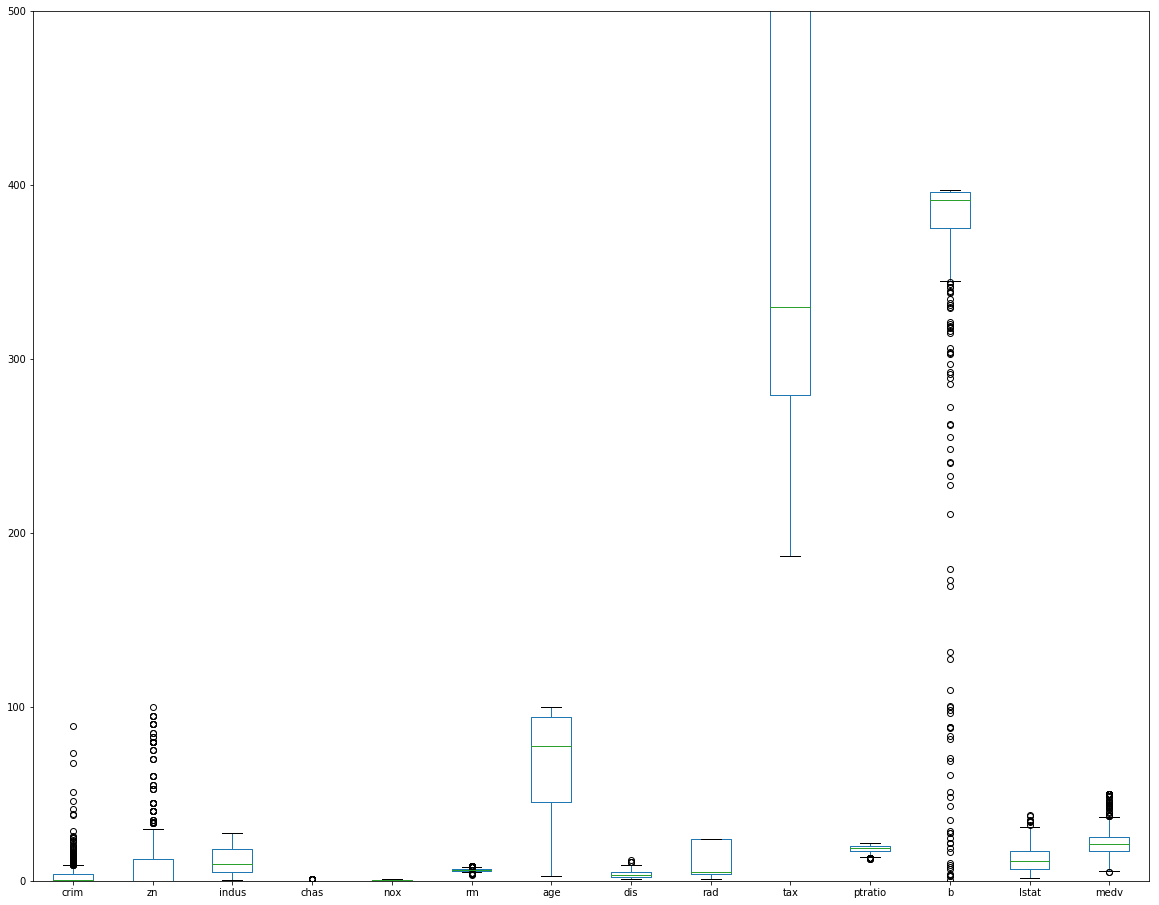

In [9]:
df_housing.plot(kind='box',figsize=(20,16),ylim=(0,500))

### Step 1:
Using Sklearn get the Boston Housing dataset.
Fit a linear regressor to the data as a baeline.  There is no need to do Cross-Validation.  We are exploring the change in results

What is the loss and what are the goodness of fit parameters?  This will be our baseline for comparison

In [10]:
column_sels = ['crim','zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio','b','lstat']
X = df_housing.loc[:,column_sels]
y = df_housing['medv']

* standarnize 

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
#Save as data frames
X = pd.DataFrame(X)
X.columns = column_sels

In [12]:
# dataframe to hold the results
i = 0 # number of models
results = pd.DataFrame(columns=['Model','MAE','MSE','RMSE','R2'])


In [13]:

def linear_model(X, y,ModelName):
    results=[]
    lr = LinearRegression(normalize=True)
    lreg = lr.fit(X, y)
    yhat = lreg.predict(X)
    mae = mean_absolute_error(y,yhat)
    mse = mean_squared_error(y,yhat)
    RMSE = rmse(y,yhat)
    r2 = r2_score(y,yhat)
#     print("MAE: %.3f"%mae)
#     print("MSE:  %.3f"%mse)
#     print("RMSE:  %.3f"%RMSE)
#     print("R2:  %.3f"%r2)
    results.append([ModelName,mae,mse,RMSE,r2])
    return results

In [14]:
results.loc[i] = linear_model(X,y,'Original')[0]

In [15]:
results

,Model,MAE,MSE,RMSE,R2
0,Original,3.270863,21.894831,4.679191,0.740643


###  Add boxplot for all of the variable

### Step 2: (repeated)
For select between 1, 5 10, 20, 33, and 50% of your data on a single column (Completely at random), replace the present value with a NAN and then perform an imputation of that value.   

In. each case perform a fit with the imputed data and compare the loss and goodness of fit to your baseline.

In [16]:
results1 = results.copy()

In [17]:
# function to randomly drop out the values from a data frame
# credit : https://datascience.stackexchange.com/questions/30245/is-there-a-way-to-replace-existing-values-with-nan?rq=1
# changed the percent to prop for later on for MAR
def dropout(data, prop):
    # create a copy
    mat = data.copy()
    # number of values to replace
    #prop = int(mat.size * percent)
    # indices to mask
    if(prop>mat.size):
        prop=mat.size
    
    mask = random.sample(range(mat.size), prop)
    # replace with NaN
    np.put(mat, mask, [np.NaN]*len(mask))
    return mat

* we select rm as the imputation column as we think this column has more corrolation with the response variable.

In [18]:
# define imput parameters
imputeList1 = [0.01,0.05,0.1,0.2,0.33,0.50]
imputeCol = 'rm'

In [19]:
# create MCAR in rm column and impute the data with mean and fit the linear model
i=1
for imputePerct in imputeList1:
    #print(imputePerct)
    X_new =X.copy()
    # propotion to dropout
    prop = int(X_new[imputeCol].size * imputePerct)
    X_new[imputeCol]= dropout(X_new[imputeCol], prop)
    print("Dropped out number of values in column ",imputeCol,":",X_new[imputeCol].isna().sum())
    #print(X_new[imputeCol])
    X_new[imputeCol]=X_new[imputeCol].fillna(X_new[imputeCol].mean())
    
    results1.loc[i]=linear_model(X_new,y,'MCAR '+ str(imputePerct*100)+'%')[0]
    i+=1
    


Dropped out number of values in column  rm : 5
Dropped out number of values in column  rm : 25
Dropped out number of values in column  rm : 50
Dropped out number of values in column  rm : 101
Dropped out number of values in column  rm : 166
Dropped out number of values in column  rm : 253


In [20]:
results1

,Model,MAE,MSE,RMSE,R2
0,Original,3.270863,21.894831,4.679191,0.740643
1,MCAR 1.0%,3.294562,21.989284,4.689273,0.739524
2,MCAR 5.0%,3.336052,22.541953,4.747837,0.732977
3,MCAR 10.0%,3.309966,22.042451,4.694939,0.738894
4,MCAR 20.0%,3.377900,22.311499,4.723505,0.735707
5,MCAR 33.0%,3.446450,23.492983,4.846956,0.721712
6,MCAR 50.0%,3.544451,24.664354,4.966322,0.707836


* when MCAR percentage increasing MAE increasing.

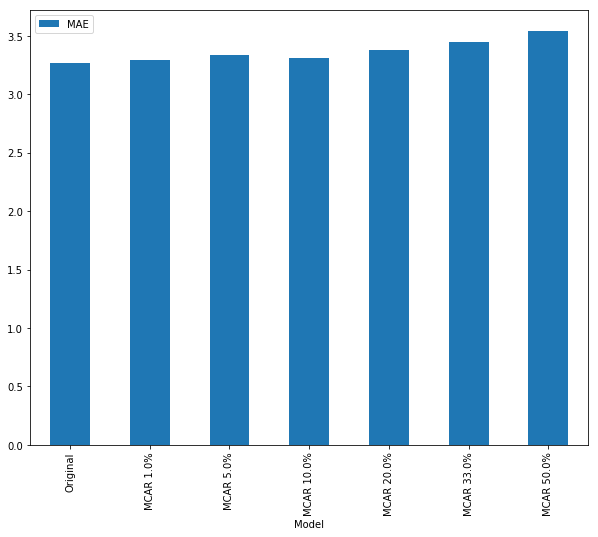

In [21]:

ax = results1.plot(kind='bar', x='Model',y='MAE', figsize  = (10,8) )

### Step 3: 
Take 2 different columns and create data “Missing at Random” when controlled for a third variable (i.e if Variable Z is > 30, than Variables X, Y are randomly missing).  Make runs with 10%, 20% and 30% missing data imputed via your best guess.  Repeat your fit and comparisons to the baseline.

* impute column b and lstat when rad greater than 4

In [22]:
# define imput parameters
imputeList2 = [0.1,0.2,0.30]
imputeCols = ['b','lstat']

In [23]:
results2 = results.copy()

In [24]:
X['rad'].describe()

count    5.060000e+02
mean     1.514379e-15
std      1.000990e+00
min     -9.828429e-01
25%     -6.379618e-01
50%     -5.230014e-01
75%      1.661245e+00
max      1.661245e+00
Name: rad, dtype: float64

In [25]:
# create MAR in b and lstat columns and impute the data with mean and fit the linear model
i=1


for imputePerct in imputeList2:
    #print(imputePerct)
    X_new =X.copy()
    # propotion to dropout
    twentyFive = X['rad'].quantile(.25)
    X_new_keep = X[X['rad']<=twentyFive]
    X_new_impute=X[X['rad']>twentyFive]
    
    for imputcol in imputeCols:
        prop = int(X_new[imputeCol].size * imputePerct)

        X_new_impute[imputeCol]= dropout(X_new_impute[imputeCol], prop)
        print("Dropped out number of values in column ",imputeCol,":",X_new_impute[imputeCol].isna().sum())
        #print(X_new[imputeCol])
        X_new_impute[imputeCol]=X_new_impute[imputeCol].fillna(X_new[imputeCol].mean())
        
    # combine 2 data frame back
    X_new_final = pd.concat([X_new_keep,X_new_impute],axis=0)
    # fit the model with final data set.
    results2.loc[i]=linear_model(X_new_final,y,'MAR '+ str(imputePerct*100)+'%')[0]
    i+=1
    

Dropped out number of values in column  rm : 50
Dropped out number of values in column  rm : 50
Dropped out number of values in column  rm : 101
Dropped out number of values in column  rm : 101
Dropped out number of values in column  rm : 151
Dropped out number of values in column  rm : 151


In [26]:
results2

,Model,MAE,MSE,RMSE,R2
0,Original,3.270863,21.894831,4.679191,0.740643
1,MAR 10.0%,5.589186,61.018336,7.811423,0.277201
2,MAR 20.0%,5.588285,61.018855,7.811457,0.277195
3,MAR 30.0%,5.591696,60.872619,7.802091,0.278928


### Step 4:  
Create a Missing Not at Random pattern in which 25% of the data is missing for a single column.    Impute your data, fit the results and compare to a baseline.

* imput column tax with MNAR when tax <=279 (25%)

In [27]:
results3 = results.copy()
imputeCol = 'tax'

In [28]:
X[imputeCol].describe()


count    5.060000e+02
mean    -9.934960e-16
std      1.000990e+00
min     -1.313990e+00
25%     -7.675760e-01
50%     -4.646726e-01
75%      1.530926e+00
max      1.798194e+00
Name: tax, dtype: float64

In [29]:
twentyFive = X[imputeCol].quantile(.25)
imputeMean = X[imputeCol].mean()

In [30]:
X_new_imput =X.copy()
X_new_imput['tax'][X_new_imput['tax']<=twentyFive] =np.nan
X_new_imput['tax'].isna().sum()


128

In [31]:
X_new_imput['tax']=X_new_imput['tax'].fillna(imputeMean)
X_new_imput['tax'].isna().sum()

0

In [32]:
i=1
results3.loc[i]=linear_model(X_new_imput,y,'MNAR 25%')[0]


In [33]:
results3

,Model,MAE,MSE,RMSE,R2
0,Original,3.270863,21.894831,4.679191,0.740643
1,MNAR 25%,3.308654,22.343945,4.726938,0.735323


### Step 5 (Extra Credit) (10 points):  
Using the MCMC method, and your data from step 4, What is the difference in performance between imputation via ‘guess’ (mean/median, etc) and MCMC.

In [34]:
data = X_new_imput.copy()

In [35]:
def calc_posterior_analytical(data, x, mu_0, sigma_0):
    sigma = 1.
    n = len(data)
    mu_post = (mu_0 / sigma_0**2 + data.sum() / sigma**2) / (1. / sigma_0**2 + n / sigma**2)
    sigma_post = (1. / sigma_0**2 + n / sigma**2)**-1
    return norm(mu_post, np.sqrt(sigma_post)).pdf(x)

In [36]:

def sampler(data, samples=4, mu_init=.5, proposal_width=.5, plot=False, mu_prior_mu=0, mu_prior_sd=1.):
    mu_current = mu_init
    posterior = [mu_current]
    for i in range(samples):
        # suggest new position
        mu_proposal = norm(mu_current, proposal_width).rvs()

        # Compute likelihood by multiplying probabilities of each data point
        likelihood_current = norm(mu_current, 1).pdf(data).prod()
        likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()
        
        # Compute prior probability of current and proposed mu        
        prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
        prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
        
        p_current = likelihood_current * prior_current
        p_proposal = likelihood_proposal * prior_proposal
        
        # Accept proposal?
        p_accept = p_proposal / p_current
        
        # Usually would include prior probability, which we neglect here for simplicity
        accept = np.random.rand() < p_accept
        
        if plot:
            plot_proposal(mu_current, mu_proposal, mu_prior_mu, mu_prior_sd, data, accept, posterior, i)
            
        if accept:
            # Update position
            mu_current = mu_proposal
        
        posterior.append(mu_current)
        
    return np.array(posterior)

# Function to display
def plot_proposal(mu_current, mu_proposal, mu_prior_mu, mu_prior_sd, data, accepted, trace, i):
    from copy import copy
    trace = copy(trace)
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16, 4))
    fig.suptitle('Iteration %i' % (i + 1))
    x = np.linspace(-3, 3, 5000)
    color = 'g' if accepted else 'r'
        
    # Plot prior
    prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
    prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
    prior = norm(mu_prior_mu, mu_prior_sd).pdf(x)
    ax1.plot(x, prior)
    ax1.plot([mu_current] * 2, [0, prior_current], marker='o', color='b')
    ax1.plot([mu_proposal] * 2, [0, prior_proposal], marker='o', color=color)
    ax1.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax1.set(ylabel='Probability Density', title='current: prior(mu=%.2f) = %.2f\nproposal: prior(mu=%.2f) = %.2f' % (mu_current, prior_current, mu_proposal, prior_proposal))
    
    # Likelihood
    likelihood_current = norm(mu_current, 1).pdf(data).prod()
    likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()
    y = norm(loc=mu_proposal, scale=1).pdf(x)
    sns.distplot(data, kde=False, norm_hist=True, ax=ax2)
    ax2.plot(x, y, color=color)
    ax2.axvline(mu_current, color='b', linestyle='--', label='mu_current')
    ax2.axvline(mu_proposal, color=color, linestyle='--', label='mu_proposal')
    #ax2.title('Proposal {}'.format('accepted' if accepted else 'rejected'))
    ax2.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax2.set(title='likelihood(mu=%.2f) = %.2f\nlikelihood(mu=%.2f) = %.2f' % (mu_current, 1e14*likelihood_current, mu_proposal, 1e14*likelihood_proposal))
    
    # Posterior
    posterior_analytical = calc_posterior_analytical(data, x, mu_prior_mu, mu_prior_sd)
    ax3.plot(x, posterior_analytical)
    posterior_current = calc_posterior_analytical(data, mu_current, mu_prior_mu, mu_prior_sd)
    posterior_proposal = calc_posterior_analytical(data, mu_proposal, mu_prior_mu, mu_prior_sd)
    ax3.plot([mu_current] * 2, [0, posterior_current], marker='o', color='b')
    ax3.plot([mu_proposal] * 2, [0, posterior_proposal], marker='o', color=color)
    ax3.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    #x3.set(title=r'prior x likelihood $\propto$ posterior')
    ax3.set(title='posterior(mu=%.2f) = %.5f\nposterior(mu=%.2f) = %.5f' % (mu_current, posterior_current, mu_proposal, posterior_proposal))
    
    if accepted:
        trace.append(mu_proposal)
    else:
        trace.append(mu_current)
    ax4.plot(trace)
    ax4.set(xlabel='iteration', ylabel='mu', title='trace')
    plt.tight_layout()
    #plt.legend()

# MCMC Movement

Wall time: 1.12 s


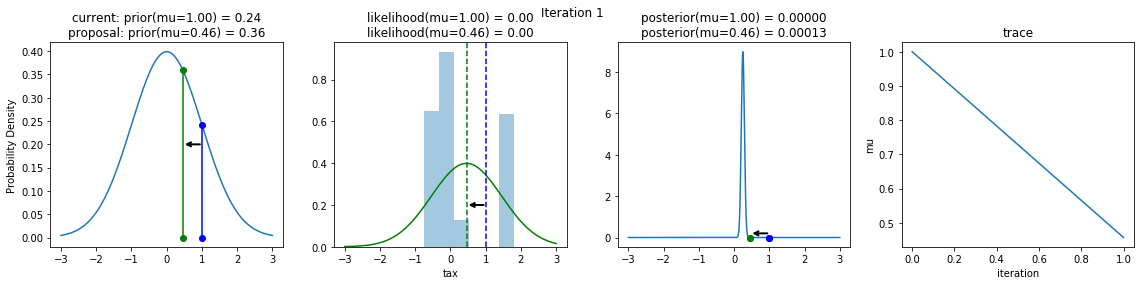

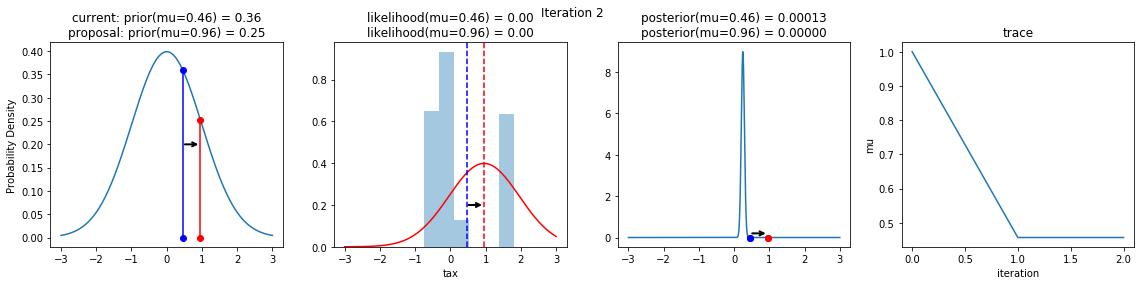

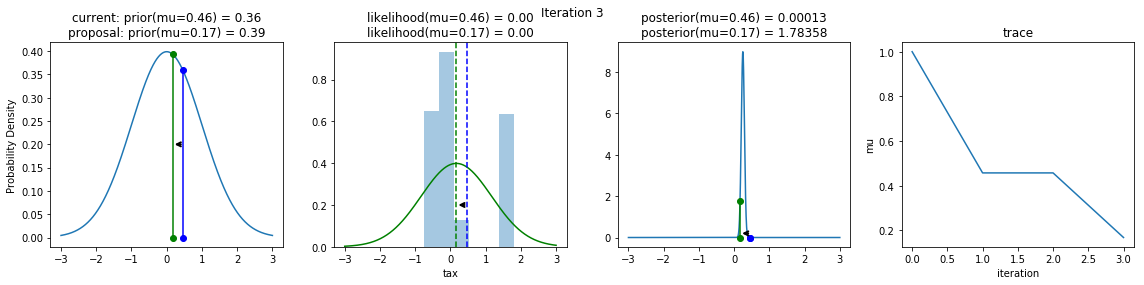

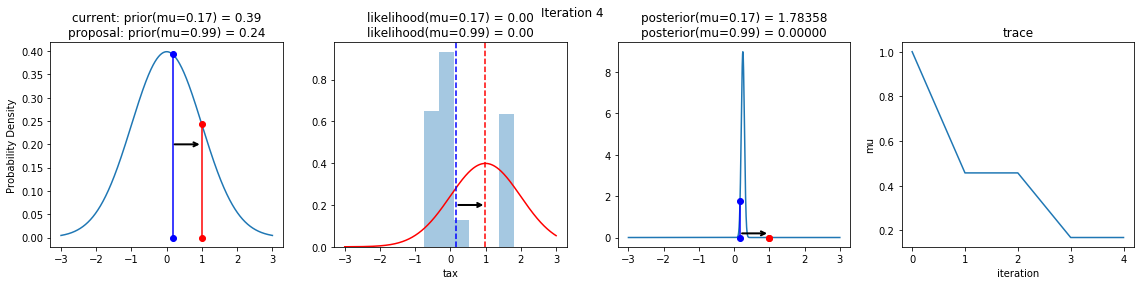

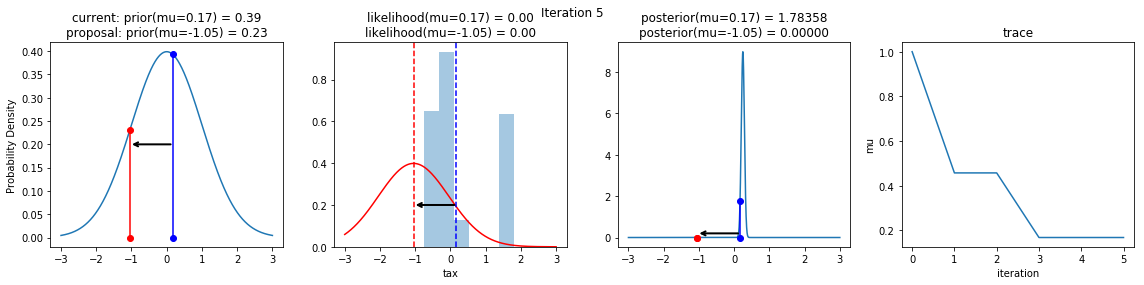

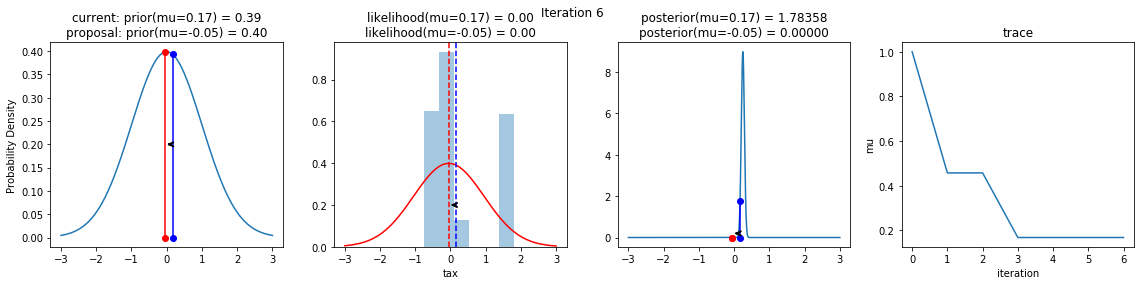

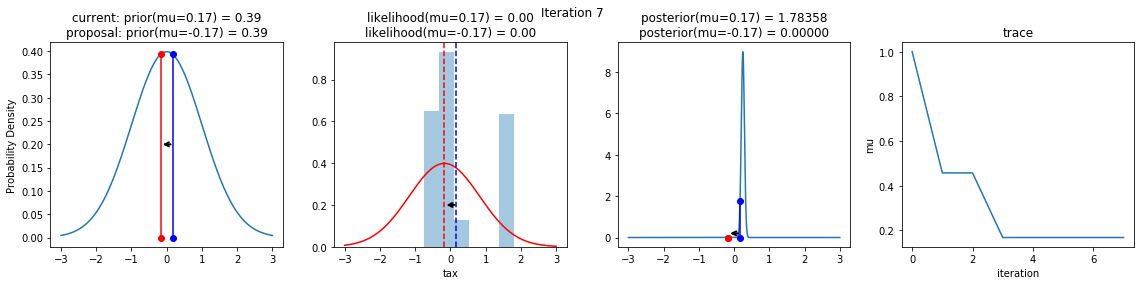

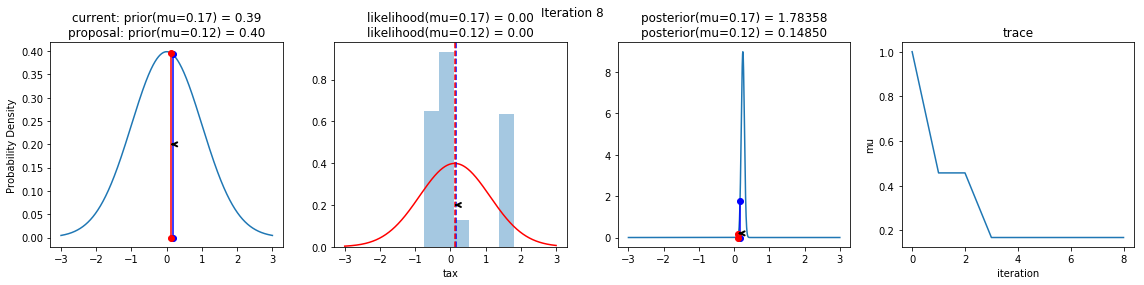

In [37]:
%%time
np.random.seed(123)
mu_current = 1
sampler(data['tax'], samples=8, mu_init=1,proposal_width=0.5,mu_prior_mu=0, plot=True);

In [38]:
%%time
np.random.seed(123)
mu_current = 1
X_new_MCMC = sampler(data['tax'], samples=len(data), mu_init=1,proposal_width=0.5,mu_prior_mu=0, plot=False);

Wall time: 2.2 s


In [39]:

data['tax']=X_new_MCMC[1:]

In [41]:
results4 = results3.copy()
i=2
results4.loc[i]=linear_model(data,y,'MCMC')[0]

In [42]:
results4

,Model,MAE,MSE,RMSE,R2
0,Original,3.270863,21.894831,4.679191,0.740643
1,MNAR 25%,3.308654,22.343945,4.726938,0.735323
2,MCMC,3.312272,22.367187,4.729396,0.735047


# Results

In [43]:
results1['ImputeMethod']='MCAR'
results2['ImputeMethod']='MAR'
results3['ImputeMethod']='MNAR'
results4['ImputeMethod']='MCMC'

In [44]:
results4

,Model,MAE,MSE,RMSE,R2,ImputeMethod
0,Original,3.270863,21.894831,4.679191,0.740643,MCMC
1,MNAR 25%,3.308654,22.343945,4.726938,0.735323,MCMC
2,MCMC,3.312272,22.367187,4.729396,0.735047,MCMC


In [46]:
results = pd.concat([results1,results2[1:],results4[1:]],axis=0)

Text(0.5,1,'Model Comprison by Different Imputation Method (by MAE)')

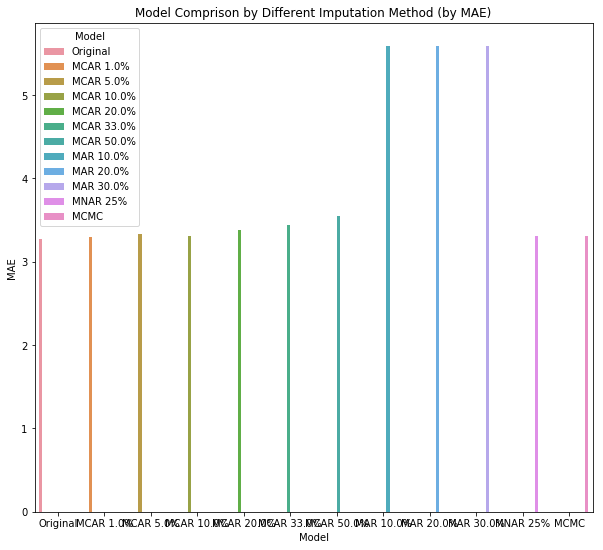

In [56]:
figure = plt.figure(figsize=(10,9))
ax = sns.barplot(x="Model", y="MAE", hue="Model", data=results)
plt.title("Model Comprison by Different Imputation Method (by MAE)")
